# **Introduction to Time Series Forecasting with Machine Learning**

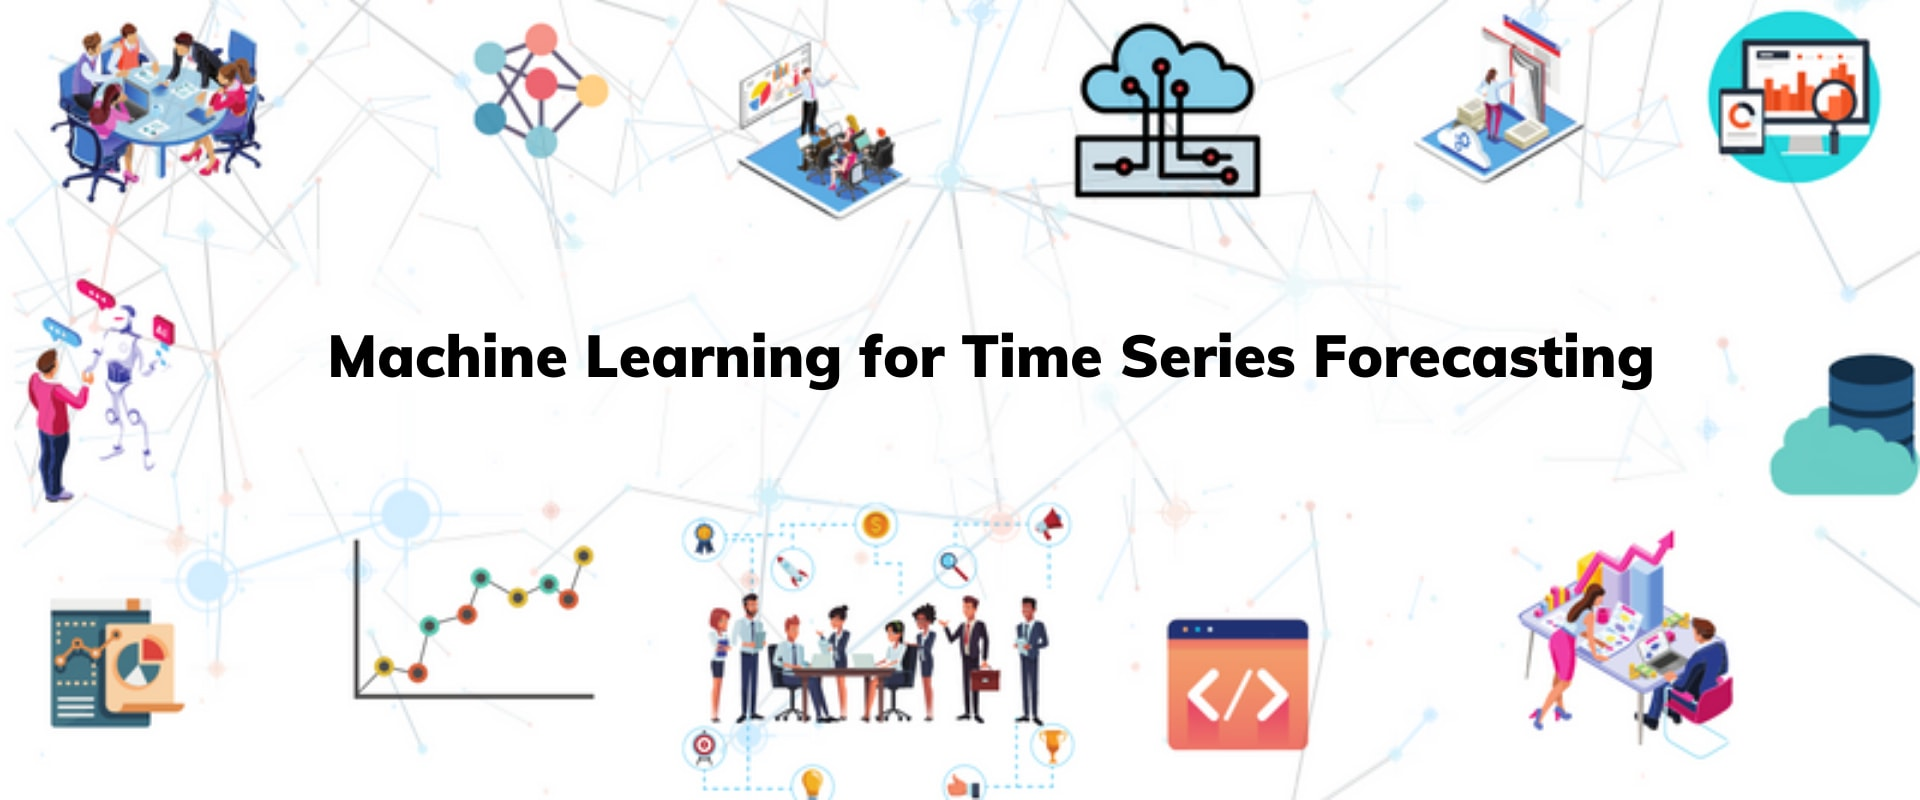

### **In this Crash course, we will be covering:**
* What is Time Series forecasting?
* Components of Time series forecasting
* Birds eye view of time series forecasting
* Types of time series forecasting
* Applications of time series forecasting
* Training a machine learning model to forecast values
* Checking statinoarity using Ducky fuller test
* Utilize the ARIMA model
* Forecasting future values
* Understanding different evaluation metrics


## **Section 1: Understanding time series forecasting**

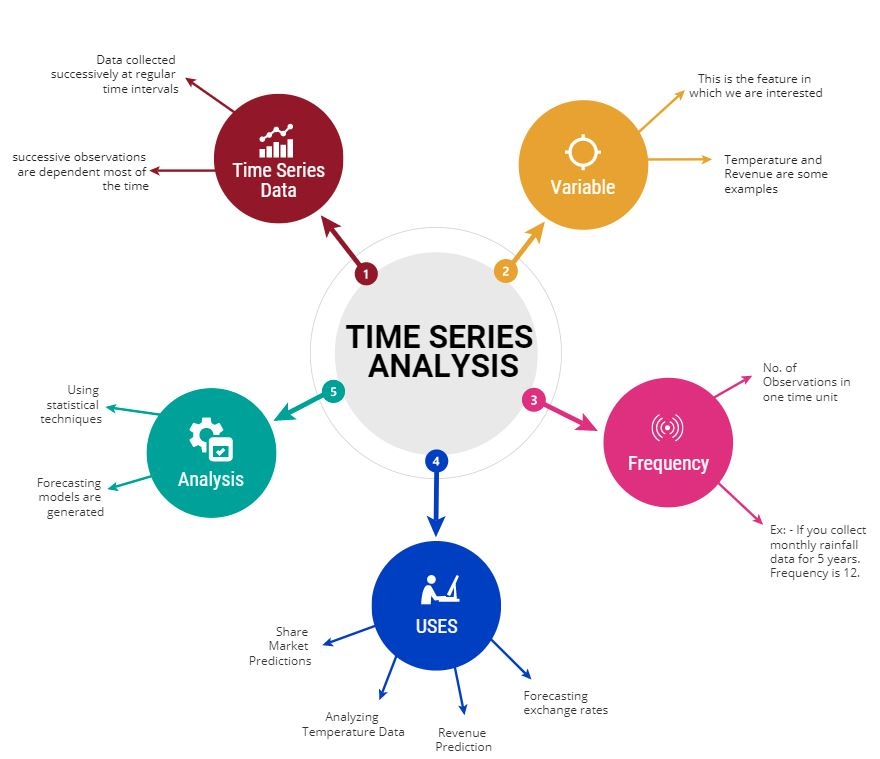

### **1.1 Introducing time series:**

The first step in understanding and performing time series forecasting is learning what a time series is. In short, a time series is simply a set of data points ordered in time. Furthermore, the data is often equally spaced in time, meaning that equal intervals separate each data point. In simpler terms, the data can be recorded at every hour or every minute, or it could be averaged over every month or year. Some typical examples of time series include the closing value of a particular stock, a household’s electricity consumption, or the temperature outside.

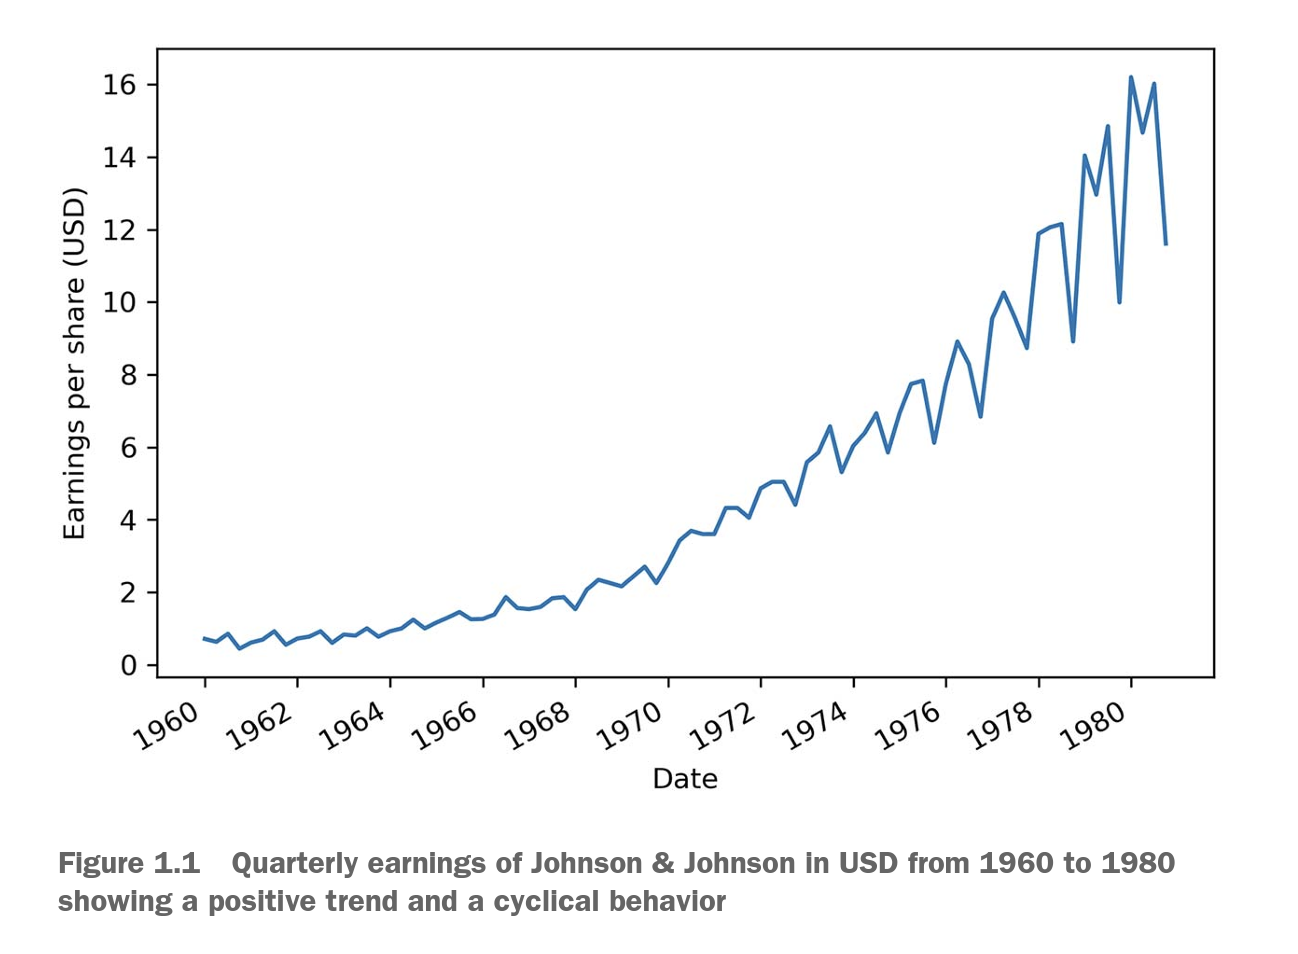


Let’s consider a dataset representing the quarterly earnings per share in US dollars of Johnson & Johnson stock from 1960 to 1980, shown in figure 1.1. We will use this dataset often throughout this book, as it has many interesting properties that will help you learn advanced techniques for more complex forecasting problems. As you can see, figure 1.1 clearly represents a time series. The data is indexed by time, as marked on the horizontal axis. Also, the data is equally spaced in time, since it was recorded at the end of every quarter of each year. We can see that the data has a trend, since the values are increasing over time. We also see the earnings going up and down over the course of each year, and the pattern repeats every year.

### **1.1.1 Components of a time series**
We can further our understanding of time series by looking at their three components: a trend, a seasonal component, and residuals. In fact, all time series can be decomposed into these three elements. Visualizing the components of a time series is known as decomposition. Decomposition is defined as a statistical task that separates a time series into its different components. We can visualize each individual component, which will help us identify the trend and seasonal pattern in the data, which is not always straightforward just by looking at a dataset. Let’s take a closer look at the decomposition of Johnson & Johnson quarterly earnings per share, shown in figure 1.2. You can see how the Observed data was split into Trend, Seasonal, and Residuals. Let’s study each piece of the graph in more detail.

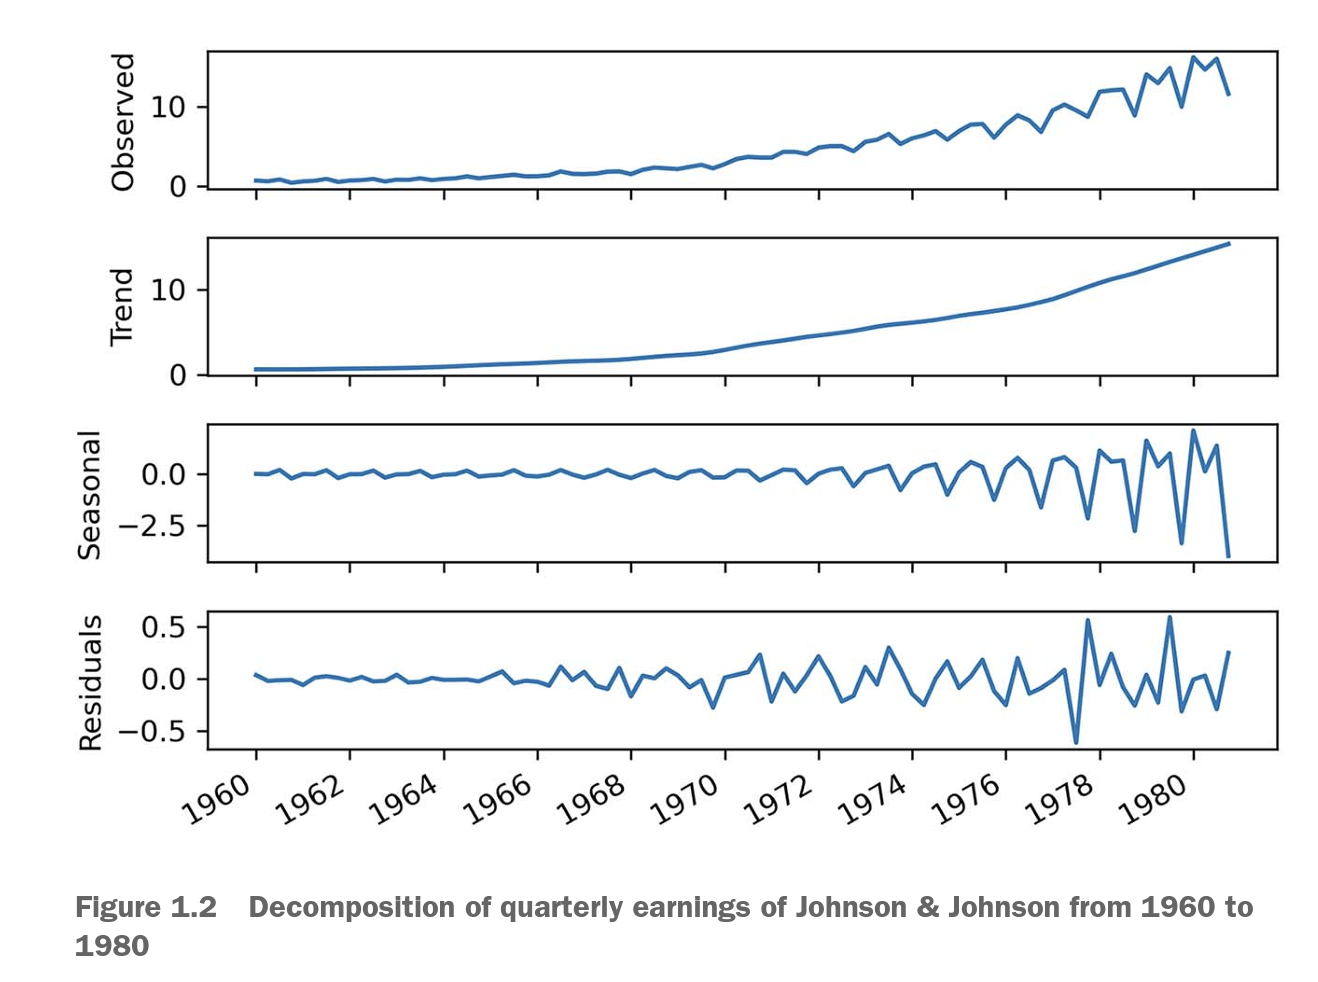

First, the top graph, labeled as Observed, simply shows the time series as it was recorded (figure 1.3). The y-axis displays the value of the quarterly earnings per share for Johnson & Johnson in US dollars, while the x-axis represents time. It is basically a recreation of figure 1.1, and it shows the result of combining the Trend, Seasonal, and Residuals graphs from figure 1.2.

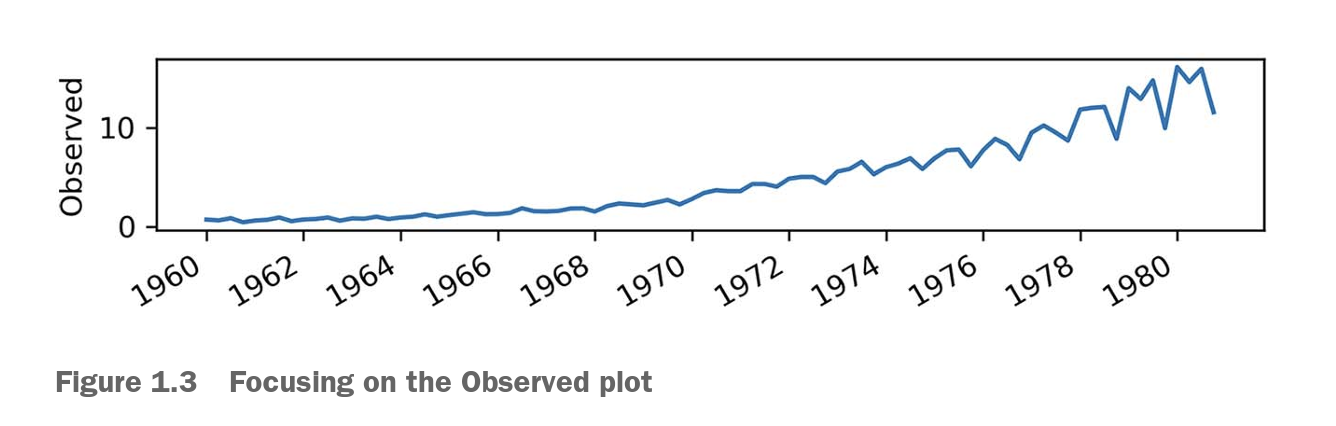

Then we have the trend component, as shown in figure 1.4. Again, keep in mind that the y-axis represents the value, while the x-axis still refers to time. The trend is defined as the slow-moving changes in a time series. We can see that it starts out flat and then steeply goes up, meaning that we have an increasing, or positive, trend in our data. The trend component is sometimes referred to as the level. We can think of the trend component as trying to draw a line through most of the data points to show the general direction of a time series. Next we see the seasonal component in figure 1.5. The seasonal component captures the seasonal variation, which is a cycle that occurs over a fixed period of time. We can see that over the course of a year, or four quarters, the earnings per share start low, increase, and decrease again at the end of the year.

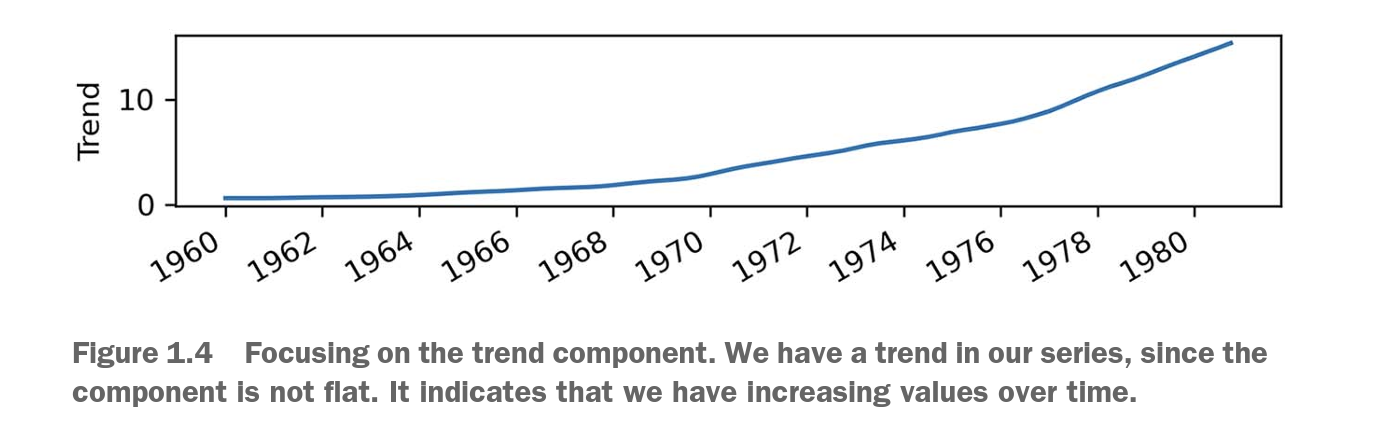

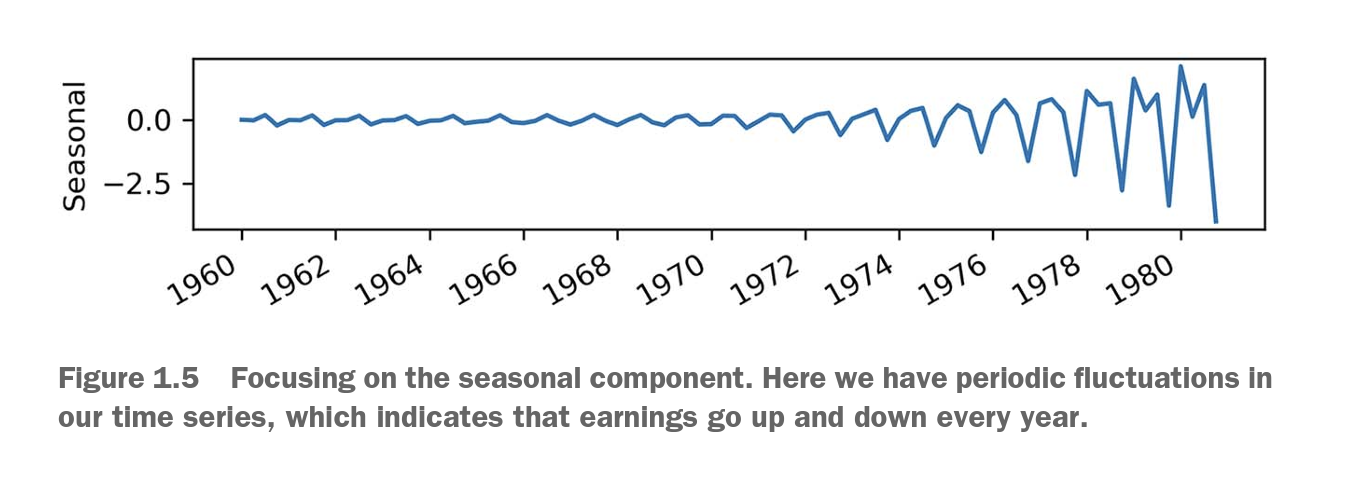

Notice how the y-axis shows negative values. Does this mean that the earnings per share are negative? Clearly, that cannot be, since our dataset strictly has positive values. Therefore, we can say that the seasonal component shows how we deviate from the trend. Sometimes we have a positive deviation, and we get a peak in the Observed graph. Other times, we have a negative deviation, and we see a trough in Observed. Finally, the last graph in figure 1.2 shows the residuals, which is what cannot be explained by either the trend or the seasonal components. We can think of the residuals as adding the Trend and Seasonal graphs together and comparing the value at each point in time to the Observed graph. For certain points, we might get the exact same value as in Observed, in which case the residual will be zero. In other cases, the value is different from the one in Observed, so the Residuals graph shows what value must be added to Trend and Seasonal in order to adjust the result and get the same value as in Observed. Residuals usually correspond to random errors, also termed white noise, as we will discuss in chapter 3. They represent information that we cannot model or predict, since it is completely random, as shown in figure 1.6.

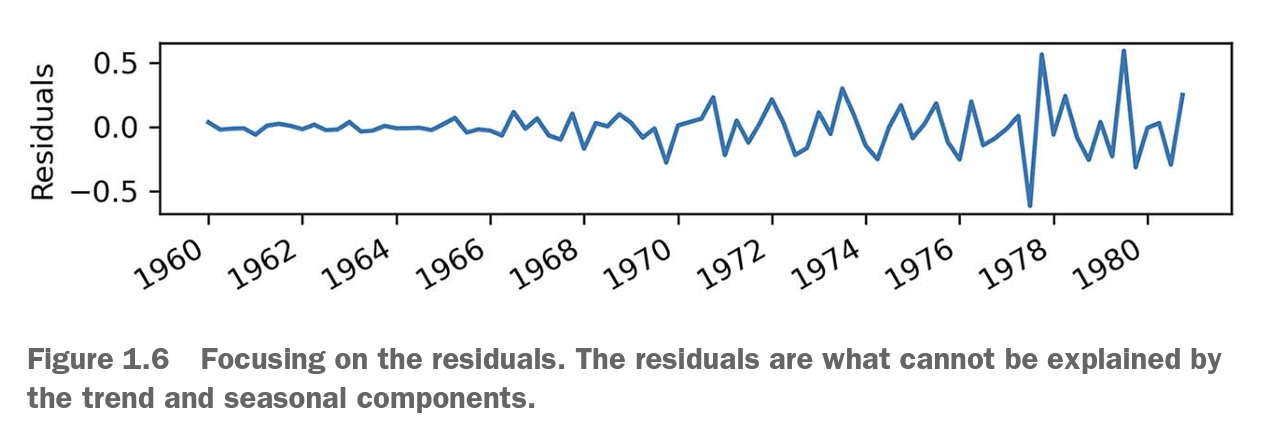

Already we can intuitively see how each component affects our work when forecasting. If a time series exposes a certain trend, then we’ll expect it to continue in the future. Similarly, if we observe a strong seasonality effect, this is likely going to continue, and our forecasts must reflect that. Later in the book, you’ll see how to account for these components and include them in your models to forecast more complex time series.

### **Time series decomposition**
Time series decomposition is a process by which we separate a time series into its components: trend, seasonality, and residuals. The trend represents the slow-moving changes in a time series. It is responsible for making the series gradually increase or decrease over time. The seasonality component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time. The residuals represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed white noise.

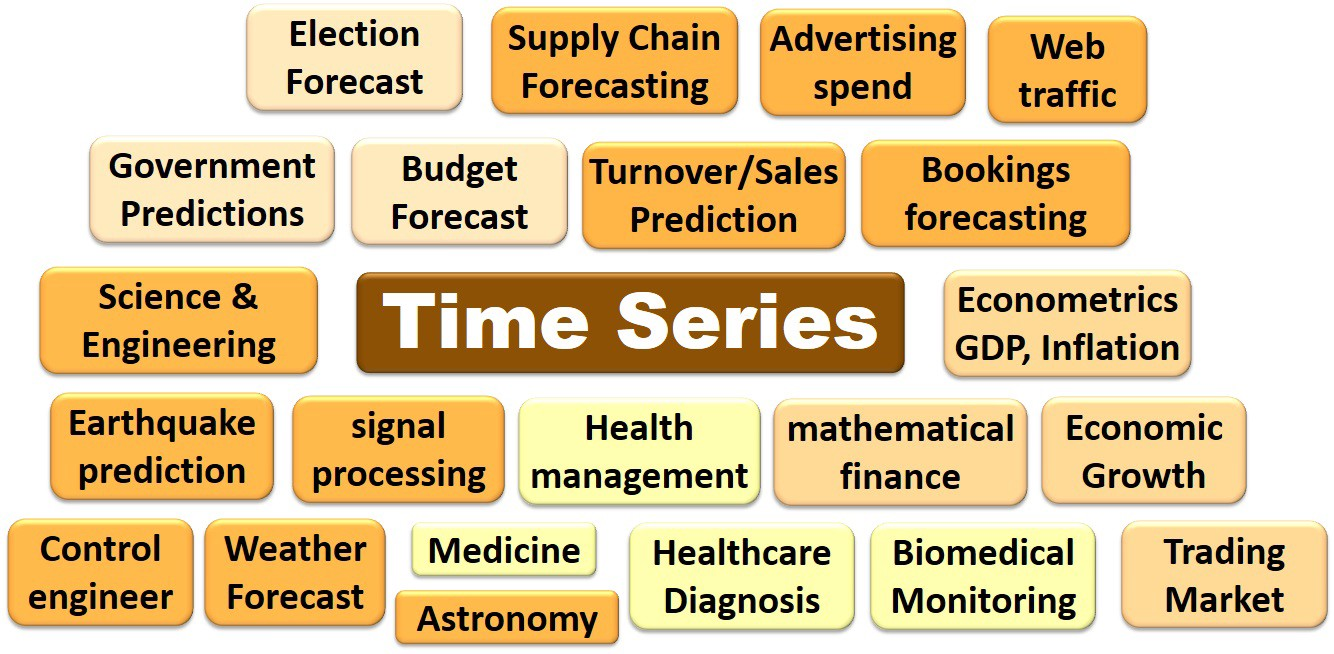

## **1.2 Bird’s-eye view of time series forecasting**

Forecasting is predicting the future using historical data and knowledge of future events that might affect our forecasts. This definition is full of promises and, as data scientists, we are often very eager to start forecasting by using our scientific knowledge to showcase an incredible model with a near-perfect forecast accuracy. However, there are important steps that must be covered before reaching the point of forecasting. Figure 1.7 is a simplified diagram of what a complete forecasting project might look like in a professional setting. Note that these steps are not universal, and they may or may not be followed, depending on the organization and its maturity. These steps are nonetheless essential to ensure good cohesion between the data team and the business team, hence providing business value and avoiding friction and frustration between the teams. Let’s dive into a scenario that covers each step of a forecasting project roadmap in detail. Imagine you are planning a one-week camping trip one month from now, and you want to know which sleeping bag to bring with you so you can sleep comfortably at night.

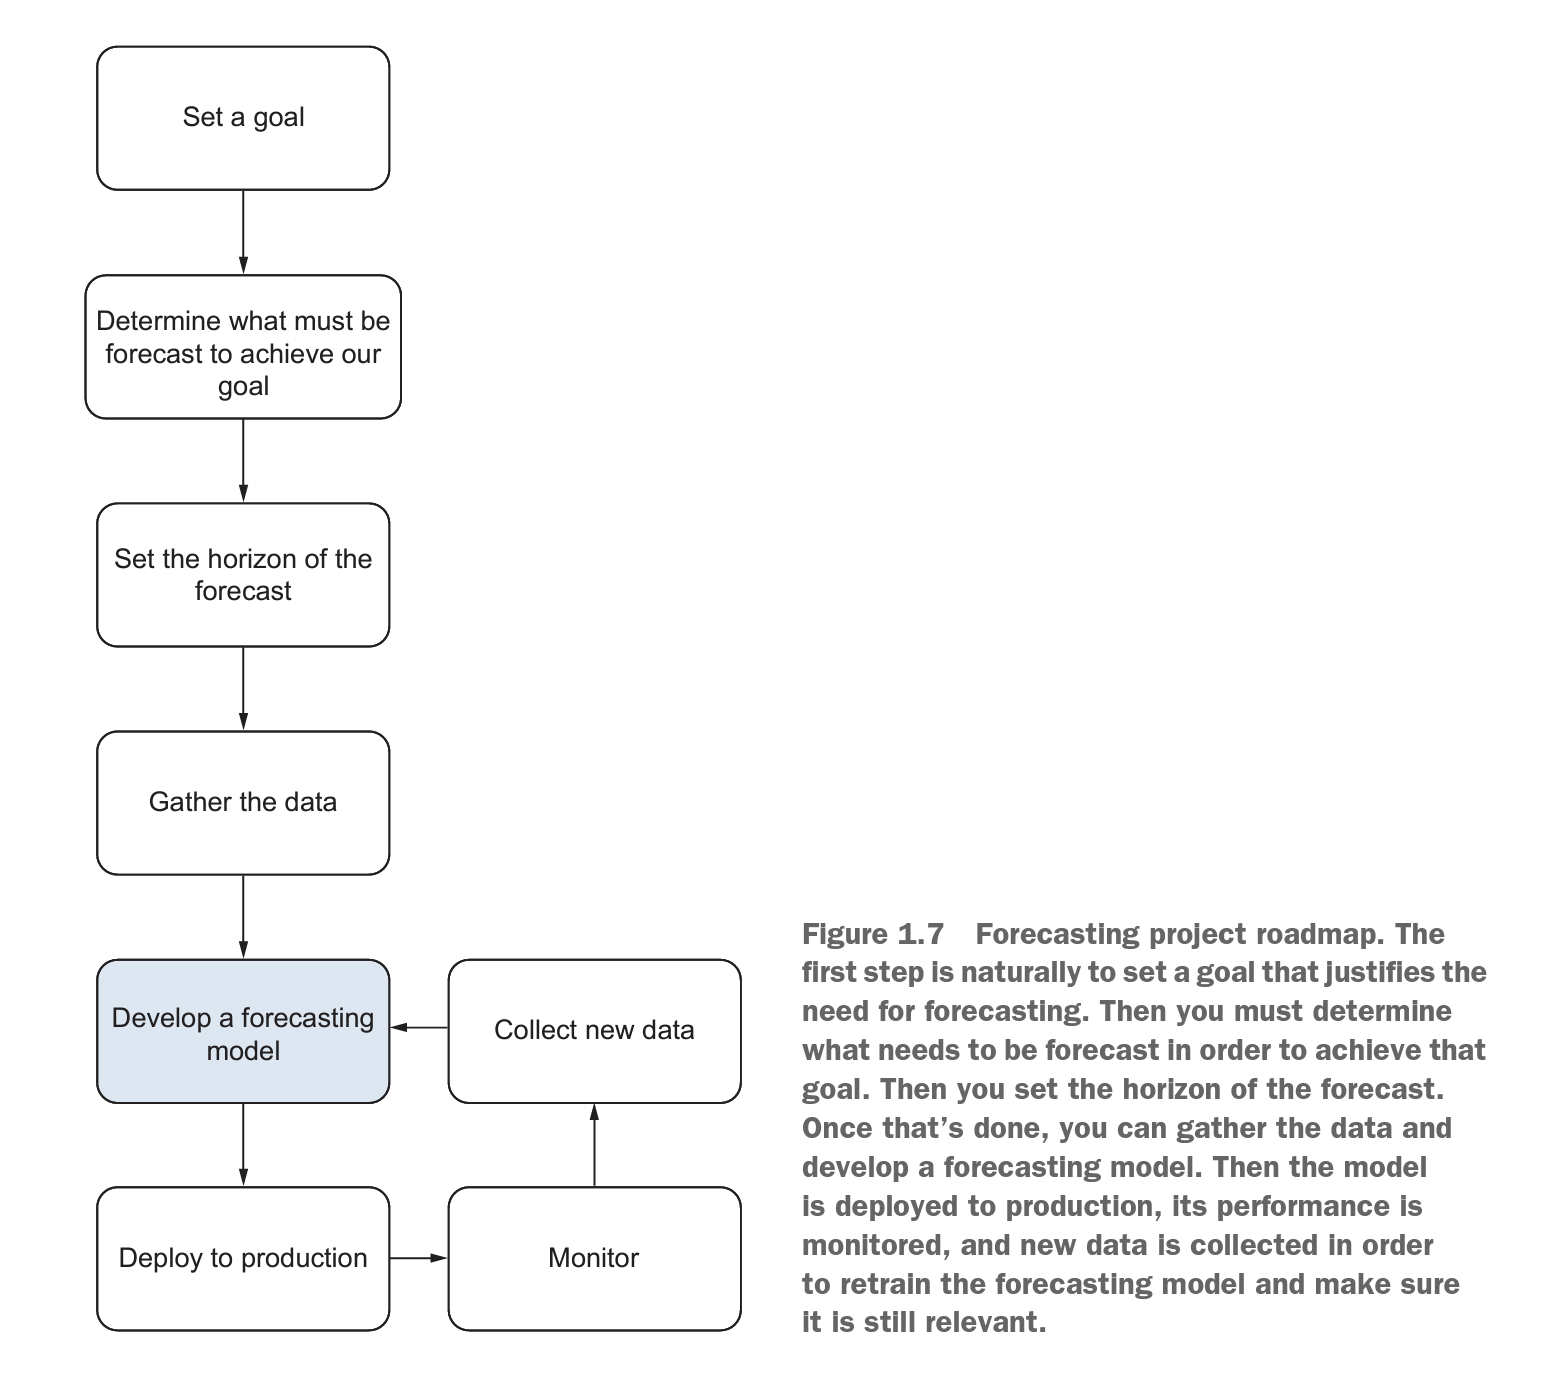

### **1.2.1 Setting a goal**
The very first step in any project roadmap is to set a goal. Here it is explicit in the scenario: you want to know which sleeping bag to bring to sleep comfortably at night. If the nights will be cold, a warm sleeping bag is the best choice. Of course, if nights are expected to be warm, then a light sleeping bag would be the better option.

### **1.2.2 Determining what must be forecast to achieve your goal**
Then you move to determining what must be forecast in order for you to decide which sleeping bag to bring. In this case, you need to predict the temperature at night. To simplify things, let’s consider that predicting the minimum temperature is sufficient to make a decision, and that the minimum temperature occurs at night.

### **1.2.4 Gathering the data**
You can now start gathering your data. For example, you could collect historical daily minimum temperature data. You could also gather data on possible factors that can influence temperature, such as humidity and wind speed.  This is when the question of how much data is enough data arises. Ideally, you would collect more than 1 year of data. That way, you could determine if there is a yearly seasonal pattern or a trend. In the case of temperature, you can of course expect some seasonal pattern over the year, since different seasons bring different minimum temperatures. However, 1 year of data is not the ultimate answer to how much data is sufficient. It highly depends on the frequency of the forecasts. In this case, you will be creating daily forecasts, so 1 year of data should be enough. If you wanted to create hourly forecasts, a few months of training data would be enough, as it would contain a lot of data points. If you were creating monthly or yearly forecasts, you would need a much larger historical period to have enough data points to train with. In the end, there is no clear answer regarding the quantity of data required to train a model. Determining this is part of the experimentation process of building a model, assessing its performance, and testing whether more data improves the model’s performance.

### **1.2.5 Developing a forecasting model**
With your historical data in hand, you are ready to develop a forecasting model. This part of the project roadmap is the focus of this entire book. This is when you get to study the data and determine whether there is a trend or a seasonal pattern. If you observe seasonality, then a SARIMA model would be relevant, because this model uses seasonal effects to produce forecasts. If you have information on wind speed and humidity, you could take that into account using the SARIMAX model, because you can feed it with information from exogenous variables, such as wind speed and humidity. We will explore these models in detail in chapters 8 and 9. If you managed to collect a large amount of data, such as the daily minimum temperature of the last 20 years, you could use neural networks to leverage this very large amount of training data. Unlike statistical learning methods, deep learning tends to produce better models, as more data is used for training. Whichever model you develop, you will use part of the training data as a test set to evaluate your model’s performance. The test set will always be the most recent data points, and it must be representative of the forecasting horizon. In this case, since your horizon is one week, you can remove the last seven data points from your training set to place them in a test set. Then, when each model is trained, you can produce one-week forecasts and compare the results to the test set. The model’s performance can be assessed by computing an error metric, such as the mean squared error (MSE). This is a way to evaluate how far your predictions are from the real values. The model with the lowest MSE will be your best-performing model, and it is the one that will move on to the next step.

### **1.2.6 Deploying to production**
Once you have your champion model, you must deploy it to production. This means that your model can take in data and return a prediction for the minimum daily temperature for the next 7 days. There are many ways to deploy a model to production, and this could be the subject of an entire book. Your model could be served as an API or integrated in a web application, or you could define your own Excel function to run your model. Ultimately, your model is considered deployed when you can feed in data and have forecasts returned without any manual manipulation of the data. At this point, your model can be monitored.
### **1.2.7 Monitoring**
 Since the camping trip is 1 month from now, you can see how well your model performs. Every day, you can compare your model’s forecast to the actual minimum temperature recorded for the day. This allows you to determine the quality of the model’s forecasts. You can also look for unexpected events. For example, a heat wave can arise, degrading the quality of your model’s forecasts. Closely monitoring your model and current events allows you to determine if the unexpected event results from a temporary situation, or if it will last for the next 2 months, in which case it could impact your decision for the camping trip.
### **1.2.8 Collecting new data**
By monitoring your model, you necessarily collect new data as you compare the model’s forecasts to the observed minimum temperature for the day. This new, more recent, data can then be used in retraining your model. That way, you have up-to-date data you can use to forecast the minimum temperature for the next 7 days. This cycle is repeated over the next month until you reach the day of the camping trip, as shown in figure 1.8. By that point, you will have made many forecasts, assessed their quality against newly observed data, and retrained your model with new daily minimum temperatures as you recorded them. That way, you make sure that your model is still performant and uses relevant data to forecast the temperature for your camping trip. Finally, based on your model’s predictions, you can decide which sleeping bag to bring with you.

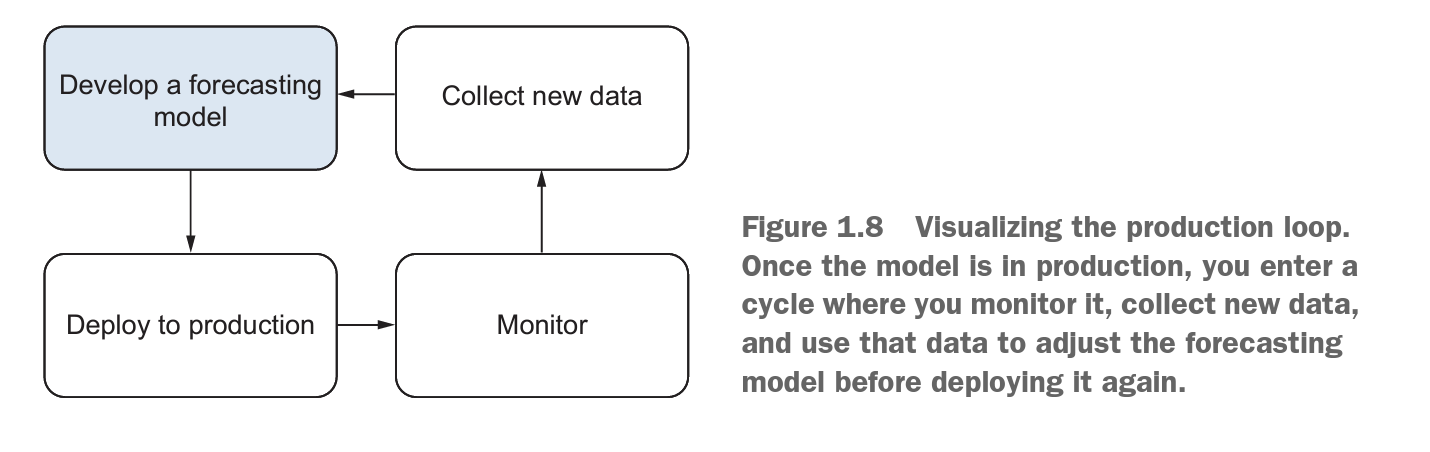

## **1.3 How time series forecasting is different from other regression tasks**

You probably have encountered regression tasks where you must predict some continuous target given a certain set of features. At first glance, time series forecasting seems like a typical regression problem: we have some historical data, and we wish to build a mathematical expression that will express future values as a function of past values. However, there are some key differences between time series forecasting and regression for time-independent scenarios that deserve to be addressed before we look at our very first forecasting technique.

### **1.3.1 Time series have an order**
The first concept to keep in mind is that time series have an order, and we cannot change that order when modeling. In time series forecasting, we express future values as a function of past values. Therefore, we must keep the data in order, so as to not violate this relationship. Also, it makes sense to keep the data in order because your model can only use information from the past up until the present—it will not know what will be observed in the future. Recall your camping trip. If you want to predict the temperature for Tuesday, you cannot possibly use the information from Wednesday, since it is in the future from the model’s point of view. You would only be able to use the data from Monday and before. That is why the order of the data must remain the same throughout the modeling process. Other regression tasks in machine learning often do not have an order. For example, if you are tasked to predict revenue based on ad spend, it does not matter when a certain amount was spent on ads. Instead, you simply want to relate the amount of ad spend to the revenue. In fact, you might even randomly shuffle the data to make your model more robust. Here the regression task is to simply derive a function such that given an amount on ad spend, an estimate of revenue is returned. On the other hand, time series are indexed by time, and that order must be kept. Otherwise, you would be training your model with future information that it would not have at prediction time. This is called look-ahead bias in more formal terms. The resulting model would therefore not be reliable and would most probably perform poorly when you make future forecasts.

### **1.3.2 Time series sometimes do not have features**
It is possible to forecast time series without the use of features other than the time series itself. As data scientists, we are used to having datasets with many columns, each representing a potential predictor for our target. For example, consider the task of predicting revenue based on ad spend, where the revenue is the target variable. As features, we could have the amount spent on Google ads, Facebook ads, and television ads. Using these three features, we would build a regression model to estimate revenue. However, with time series, it is quite common to be given a simple dataset with a time column and a value at that point in time. Without any other features, we must learn ways of using past values of the time series to forecast future values. This is when the moving average model (chapter 4) or autoregressive model (chapter 5) come into play, as they are ways to express future values as a function of past values. These models are foundational to the more complex models that then allow you to consider seasonal patterns and trends in time series. Starting in chapter 6, we will gradually build on those basic models to forecast more complex time series.

### **1.3.3 Types of Time Series Forecasting**
There are two main types of time series forecasting: univariate and multivariate.

* **Univariate time series forecasting:** In this type, we use only one variable to predict future values. For example, we can use historical data of a company's stock prices to predict future prices.

* **Multivariate time series forecasting:** In this type, we use multiple variables to predict future values. For example, we can use historical data of a company's stock prices, sales figures, and economic indicators to predict future prices.

### **1.3.3.1 Types of Time Series Forecasting techniques**
here are several types of time series forecasting techniques, each suited for different types of data and use cases. Some of the most common types are:

* **Autoregressive Integrated Moving Average (ARIMA):** This is a popular model for time series forecasting that incorporates autoregression, differencing, and moving average components. It assumes that the time series is stationary and can be modeled as a linear combination of its past values and past errors.

* **Exponential Smoothing (ES):** This is a family of models that uses a weighted average of past observations to forecast future values. It assumes that the future values of a time series are a function of the past values and the errors associated with them.

* **Vector Autoregression (VAR):** This model is used to forecast multiple time series that are interdependent. It assumes that each time series is a function of its own past values and the past values of other time series.

* **Prophet:** This is a time series forecasting model developed by Facebook that uses a decomposable model with three main components: trend, seasonality, and holidays. It can handle missing values, outliers, and changes in trends and seasonality over time.

* **Long Short-Term Memory (LSTM):** This is a type of neural network that is often used for time series forecasting. It is capable of capturing long-term dependencies in time series data and can be trained to make predictions based on past values of the time series.

* **Gradient Boosted Trees (GBT):** This is an ensemble method that combines multiple decision trees to make a prediction. It is often used for time series forecasting because it can capture complex patterns in the data.



### **1.3.4 Applications of Time Series forecasting and analysis**

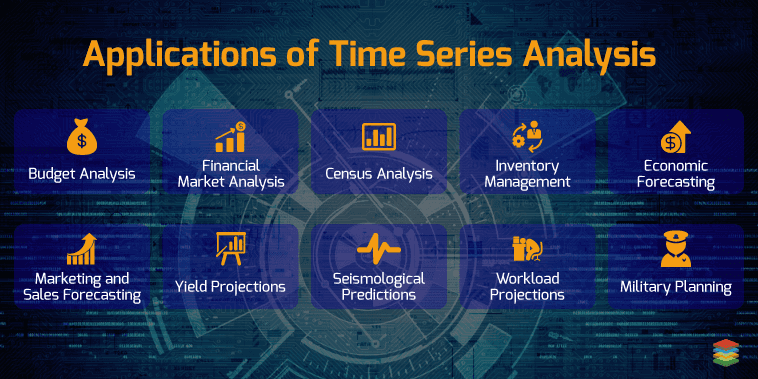

Time series analysis and forecasting has many applications in various fields. Some of the common applications are:

* **Budget Analysis:** Time series analysis can be used to forecast and track the expenses and revenues of an organization. It can be helpful in identifying trends, seasonal fluctuations, and forecasting future budgets based on historical data.

* **Financial Market Analysis:** Time series analysis is widely used in financial markets to predict stock prices, interest rates, and other financial variables. It helps investors and traders to make informed decisions based on historical data and market trends.

* **Census Analysis:** Time series analysis can be used to track the population growth, migration patterns, and demographic changes over time. It can help policymakers to understand the population dynamics and plan for future development.

* **Inventory Management:** Time series analysis can be used to forecast demand for products and optimize inventory levels. It can help businesses to reduce inventory costs and improve customer satisfaction by ensuring that products are always available when needed.

* **Economic Forecasting:** Time series analysis is an important tool for economic forecasting. It is used to predict variables such as GDP, inflation, and unemployment rates, which are critical for policymakers, businesses, and investors.

* **Marketing and Sales Forecasting:** Time series analysis can be used to forecast demand for products and services based on historical sales data. It helps businesses to plan marketing campaigns, optimize pricing, and manage inventory levels.

* **Yield Projections:** Time series analysis is used in agriculture to predict crop yields based on weather patterns, soil conditions, and other variables. It helps farmers to make informed decisions about planting, harvesting, and crop management.

* **Seismological Predictions:** Time series analysis is used to monitor seismic activity and predict earthquakes. It helps scientists to understand the underlying processes that cause earthquakes and develop early warning systems.

* **Workload Projections:** Time series analysis can be used to forecast demand for labor and resources based on historical data. It helps businesses and organizations to plan for future staffing needs and resource allocation.

* **Military Planning:** Time series analysis is used in military planning to predict enemy movements and plan military operations. It helps military strategists to make informed decisions based on historical data and other intelligence sources.

* **Economics and finance:** Time series forecasting is widely used in economics and finance to predict stock prices, exchange rates, and other financial metrics. Accurate forecasting can help businesses and investors make informed decisions.

* **Sales and marketing:** Time series forecasting can help businesses predict future sales and demand for their products or services. This can help them optimize their inventory, production, and marketing strategies.

* **Energy and utilities:** Time series forecasting is used in the energy sector to predict electricity demand and prices. This can help utilities optimize their production and distribution systems and reduce costs.

* **Healthcare:** Time series forecasting is used in healthcare to predict disease outbreaks, hospital admissions, and patient outcomes. This can help healthcare providers allocate resources more efficiently and improve patient care.















### **1.3.5 Data Requirements for Time Series Forecasting**
To perform time series forecasting, we need historical data of the time series we want to forecast. The data should be at regular intervals, such as daily, weekly, or monthly. It's also important to ensure the data is stationary, meaning that the statistical properties of the data do not change over time. If the data is not stationary, we may need to perform transformations to make it stationary before using it for forecasting.

## **Summary of the theory section**
* A time series is a set of data points ordered in time.
* Examples of time series are the closing price of a stock or the temperature outside.
* Time series can be decomposed into three components: a trend, a seasonal component, and residuals.
* It is important to have a goal when forecasting and to monitor the model once it’s deployed. This will ensure the success and longevity of the project.
* Never change the order of a time series when modeling. Shuffling the data is not allowed.

## **1.4 Step-by-Step Guide to Time Series Forecasting in Python**

For this example, we will use the Air Passengers dataset, which contains the monthly number of passengers traveling by air in the United States from 1949 to 1960. The dataset used is called "International Airline Passengers" and is a classic time series dataset used in the forecasting literature. You can find it in many places online, including the following link to the dataset on Kaggle: [Dataset Link](https://www.kaggle.com/rakannimer/air-passengers)

The dataset contains monthly international airline passenger numbers from 1949 to 1960, and is provided as a CSV file.

### **Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

We import the required libraries for data manipulation, visualization, statistical analysis, and modeling.

### **Step 2: Load and Visualize Data**

We will load the dataset from a raw URL from github and use the read_csv function from pandas to store it in a dataframe

In [ ]:
# Load data
link = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
data = pd.read_csv(link)

we will Create a figure with a width of 15 inches and a height of 5 inches to Plot the values in the data['Month'] column on the x-axis and the values in the data['#Passengers'] column on the y-axis.
Label the x-axis "Year" and the y-axis "Number of Passengers".
Set the x-ticks to every 20 years.

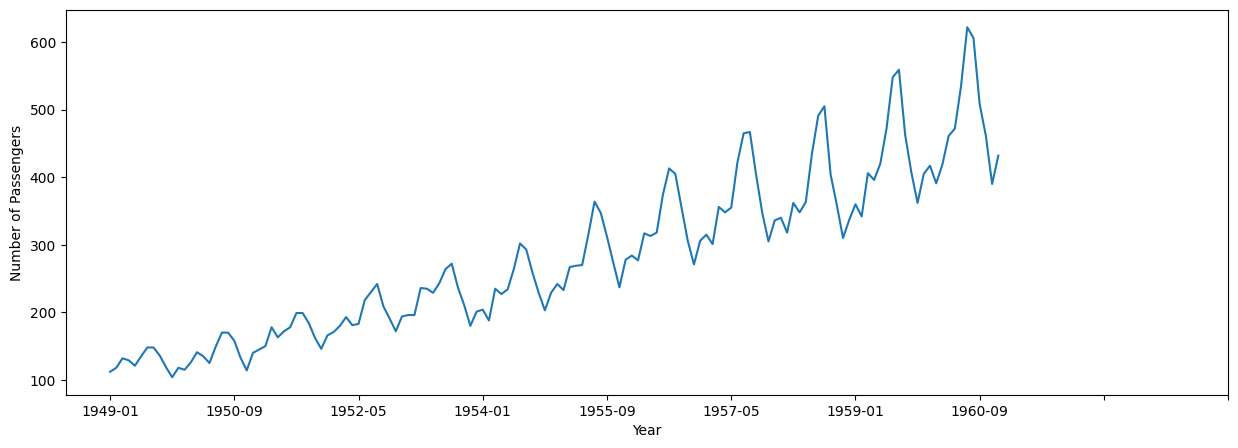

In [ ]:
# Visualize data
plt.figure(figsize=(15, 5))
plt.plot(data['Month'], data['#Passengers'])
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.xticks(np.arange(0, 200, 20))
plt.show()

The graph shows a linear increase in the number of passengers with increasing years, it means that the number of passengers is increasing at a constant rate. This can be due to a number of factors, such as:

* **Population growth:** As the population grows, so does the demand for transportation.
* **Economic growth:** As the economy grows, people have more disposable income to spend on travel.
* **Improved infrastructure:** As infrastructure improves, it becomes easier and more affordable to travel.
* **Changes in lifestyle:** People are increasingly choosing to travel for leisure and business.

If you see a linear increase in the number of passengers with increasing years, it is a good indication that the trend is likely to continue in the future. This information can be used to make informed decisions about transportation planning, such as investing in new infrastructure or expanding existing services.

### **Step 3: Check Stationarity**



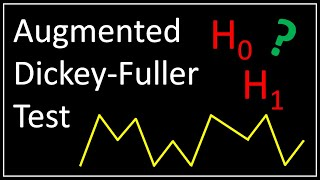

#### **What is Stationarity?**
Stationarity in time series forecasting is a statistical property of a time series that means that its statistical properties do not change over time. This means that the mean, variance, and autocorrelation of the time series are constant.

Stationarity is an important assumption for many time series forecasting methods. This is because these methods are designed to work with stationary time series. If a time series is not stationary, these methods may not be able to produce accurate forecasts.

There are a number of ways to check if a time series is stationary. One way is to look at the plot of the time series. If the plot shows a trend or seasonality, then the time series is not stationary. Another way to check for stationarity is to use statistical tests.

If a time series is not stationary, it can be made stationary by using a process called differencing. Differencing is a process of subtracting the value of a time series at one point in time from the value of the time series at the previous point in time.
​

By differencing a time series, we can often make it stationary. Once a time series is stationary, we can use time series forecasting methods to produce accurate forecasts.



#### **what is Dickey-Fuller test?**
The Dickey-Fuller test is a statistical test that is used to determine if a time series is stationary. A stationary time series is one whose statistical properties do not change over time. The Dickey-Fuller test is a non-parametric test, which means that it does not make any assumptions about the distribution of the data.

The Dickey-Fuller test is a hypothesis test. The null hypothesis is that the time series is not stationary, and the alternative hypothesis is that the time series is stationary. The test statistic is calculated, and if the test statistic is significant, then the null hypothesis is rejected and the alternative hypothesis is accepted.

The Dickey-Fuller test is a useful tool for time series analysis. It can be used to determine if a time series is stationary, and if it is not, then it can be used to identify the type of non-stationarity that is present. This information can then be used to choose an appropriate time series forecasting model.


We define a function check_stationarity to check the stationarity of the time series. The function calculates the rolling mean and rolling standard deviation of the time series and plots them along with the original data. It also performs the Dickey-Fuller test to check for stationarity.

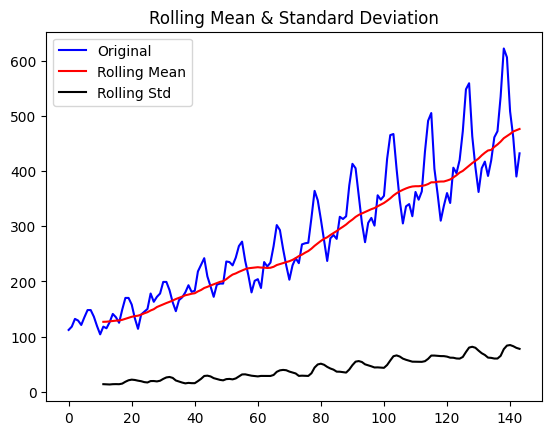

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4],
                           index=['Test Statistic', 'p-value',
                                  '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

check_stationarity(data['#Passengers'])

We apply the check_stationarity function to the Air Passengers dataset.

The plot shows that the mean and variance of the time series increase over time, indicating that the data is not stationary. The Dickey-Fuller test also confirms that the data is not stationary.

The Augmented Dickey-Fuller (ADF) test is a statistical test used to check if a time series is stationary. The ADF test has two outputs: the ADF statistic and the p-value.

The ADF statistic is a measure of the strength of the evidence against the null hypothesis of non-stationarity. The p-value is the probability of obtaining the observed ADF statistic or a more extreme statistic under the null hypothesis of non-stationarity.

**In this case, the ADF statistic is 0.8153688792060498 and the p-value is 0.991880243437641. The p-value is greater than 0.05, which means that we cannot reject the null hypothesis of non-stationarity. Therefore, we cannot conclude that the time series is stationary.**

In order to make the time series stationary, we can use differencing. Differencing is a process of subtracting the value of a time series at one point in time from the value of the time series at the previous point in time.

**By differencing a time series, we can often make it stationary. Once a time series is stationary, we can use time series forecasting methods to produce accurate forecasts.**

### **Step 4: Transform Data**

The check_stationarity() function first calculates the rolling mean and standard deviation of the time series. It then plots the original time series, the rolling mean, and the rolling standard deviation. Finally, it performs a Dickey-Fuller test on the time series and prints the results of the test.

The Dickey-Fuller test is a statistical test that is used to determine if a time series is stationary. A stationary time series is one whose statistical properties do not change over time. The Dickey-Fuller test is a non-parametric test, which means that it does not make any assumptions about the distribution of the data.

The Dickey-Fuller test is a hypothesis test. The null hypothesis is that the time series is not stationary, and the alternative hypothesis is that the time series is stationary. The test statistic is calculated, and if the test statistic is significant, then the null hypothesis is rejected and the alternative hypothesis is accepted.

The Dickey-Fuller test is a useful tool for time series analysis. It can be used to determine if a time series is stationary, and if it is not, then it can be used to identify the type of non-stationarity that is present. This information can then be used to choose an appropriate time series forecasting model.

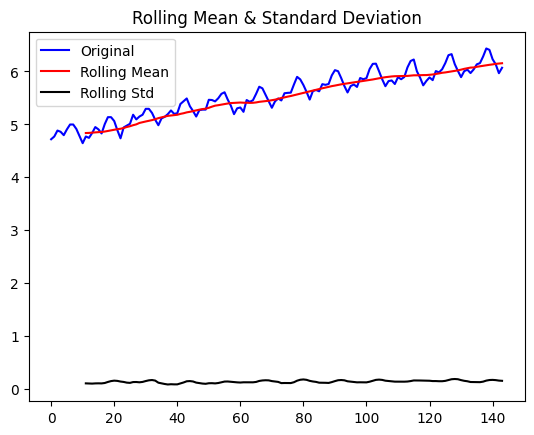

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
# Take the log of the data
log_data = np.log(data['#Passengers'])

# Check stationarity
check_stationarity(log_data)


To make the data stationary, we take the logarithm of the data, which reduces the trend in the data. We apply the check_stationarity function to the transformed data.

The plot shows that the mean and variance of the time series are relatively constant over time, indicating that the data is now stationary. The Dickey-Fuller test also confirms that the data is now stationary.



### **Step 5: Split Data into Training and Testing Sets**



In [ ]:
# Split data into training and testing sets
train_size = int(len(log_data) * 0.8)
train_data, test_data = log_data[:train_size], log_data[train_size:]

We split the data into training and testing sets, where the training set contains 80% of the data and the testing set contains the remaining 20% of the data.

### **Step 6: Fit ARIMA Model**

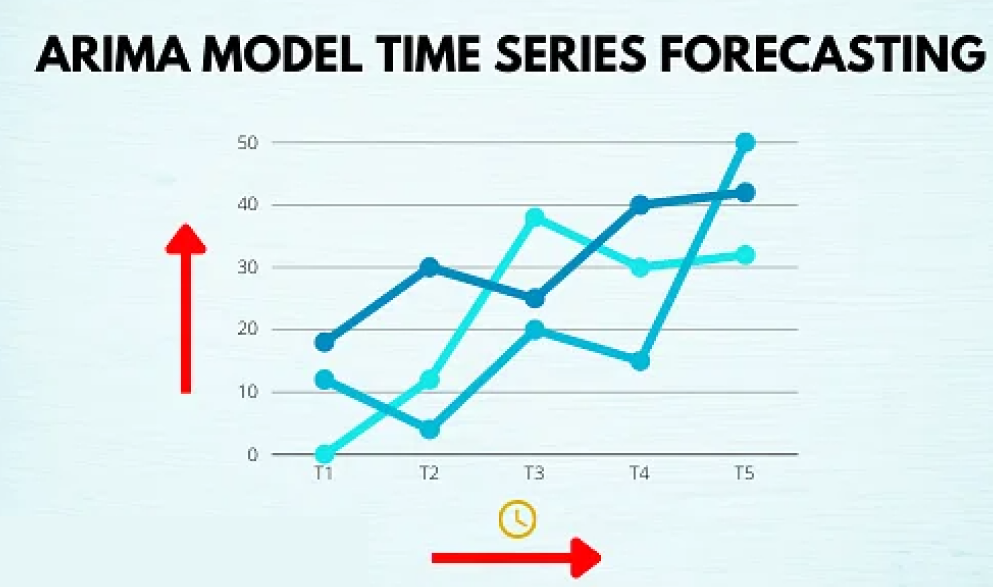

The ARIMA() function will create an ARIMA model object. The train_data argument is the training dataset. The order=(2, 1, 2) argument specifies the order of the ARIMA model. The order is a tuple of three integers, where the first integer is the number of autoregressive terms, the second integer is the number of differencing terms, and the third integer is the number of moving average terms.
The fit() method fits the ARIMA model to the training data.
The summary() method prints a summary of the ARIMA model. The summary includes the model's coefficients, its AIC and BIC scores, and its residuals.

In [ ]:
# Fit ARIMA model
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 104.653
Date:                Tue, 25 Apr 2023   AIC                           -199.305
Time:                        00:48:41   BIC                           -185.624
Sample:                             0   HQIC                          -193.753
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2467      0.187      1.316      0.188      -0.121       0.614
ar.L2          0.2590      0.241      1.074      0.283      -0.214       0.732
ma.L1         -0.0878      0.141     -0.622      0.5

We fit an ARIMA model to the training data. The order parameter specifies the order of the ARIMA model, where the first parameter is the autoregression (AR) order, the second parameter is the differencing (I) order, and the third parameter is the moving average (MA) order. In this example, we use an ARIMA(2,1,2) model. We print a summary of the model.

**The SARIMAX Results table shows the results of fitting a SARIMAX model to the time series. The table includes the following information:**

* **The dependent variable:** This is the variable that is being forecasted. In this case, the dependent variable is the number of passengers.
* **The number of observations:** This is the number of data points that were used to fit the model. In this case, there are 115 observations.
The model: This is the type of model that was fit to the data. In this case, the model is an ARIMA(2, 1, 2) model.
* **The log likelihood:** This is a measure of how well the model fits the data. A higher log likelihood indicates a better fit. In this case, the log likelihood is 104.653.
* **The AIC, BIC, and HQIC:** These are three different measures of model fit. The AIC is the Akaike information criterion, the BIC is the Bayesian information criterion, and the HQIC is the Hannan-Quinn information criterion. Lower values of these measures indicate a better fit. In this case, the AIC, BIC, and HQIC are all negative, which indicates that the model fits the data well.
* **The covariance type:** This is the type of covariance matrix that was used to fit the model. In this case, the covariance matrix is an opg covariance matrix.
* **The coefficients:** These are the coefficients of the model. The coefficients are the weights that are applied to the lagged values of the dependent variable and the exogenous variables to predict the future values of the dependent variable. In this case, the coefficients are as follows:
* **ar.L1 = 0.2467**
* **ar.L2 = 0.2590**
* **ma.L1 = -0.0878**
* **ma.L2 = -0.6564**
* **sigma2 = 0.0093**

* **The Ljung-Box (L1) (Q) and Jarque-Bera (JB) statistics:** These are two statistical tests that are used to check for serial correlation and normality in the residuals of the model. The Ljung-Box statistic is a portmanteau test, which means that it tests for the presence of multiple types of serial correlation. The Jarque-Bera statistic is a test for normality. In this case, the Ljung-Box statistic is 0.03 and the Jarque-Bera statistic is 6.51. Both of these values are non-significant, which indicates that there is no evidence of serial correlation or normality in the residuals of the model.
* **The heteroscedasticity (H) and skew:** These are two measures of the distribution of the residuals of the model. The heteroscedasticity measure is a measure of the variance of the residuals. The skew measure is a measure of the skewness of the residuals. In this case, the heteroscedasticity measure is 1.06 and the skew measure is -0.00. Both of these values are close to 0, which indicates that the residuals are approximately normally distributed.
* **The kurtosis:** This is a measure of the peakedness of the distribution of the residuals. In this case, the kurtosis is 1.83. This value is slightly higher than the value for a normal distribution, which indicates that the residuals are slightly more peaked than a normal distribution.

**Overall, the SARIMAX Results table indicates that the model fits the data well and that the residuals are approximately normally distributed. This suggests that the model can be used to make accurate forecasts of the number of passengers.**

### **Step 7: Forecast Future Values**

We will Load the data from the URL using the pd.read_csv() function.
Converts the Passengers column to a numeric type using the pd.to_numeric() function.
Drops any missing values using the dropna() method.
Fits an ARIMA model to the data using the ARIMA() function.
Makes predictions using the predict() method.
Prints the predictions.

In [ ]:
# Load data from URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=None, names=['Month', 'Passengers'], index_col=0, parse_dates=True)

df['Passengers'] = pd.to_numeric(df['Passengers'], errors='coerce')
df.dropna(inplace=True)


# Fit model to entire dataset
model = ARIMA(df, order=(2, 1, 2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start='1958-01-01', end='1960-12-01', typ='levels')

# Print predictions
print(predictions)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1958-01-01    346.463426
1958-02-01    366.563868
1958-03-01    359.658128
1958-04-01    405.193274
1958-05-01    389.408853
1958-06-01    393.842671
1958-07-01    440.685405
1958-08-01    464.899014
1958-09-01    451.116173
1958-10-01    346.143496
1958-11-01    309.765907
1958-12-01    282.607837
1959-01-01    329.871076
1959-02-01    371.243925
1959-03-01    372.919565
1959-04-01    441.648241
1959-05-01    434.227938
1959-06-01    451.155142
1959-07-01    484.510222
1959-08-01    530.562398
1959-09-01    515.310244
1959-10-01    414.606226
1959-11-01    366.760427
1959-12-01    340.884710
1960-01-01    398.194780
1960-02-01    424.816978
1960-03-01    416.245669
1960-04-01    452.658330
1960-05-01    492.451801
1960-06-01    496.152773
1960-07-01    539.260368
1960-08-01    594.969317
1960-09-01    557.269371
1960-10-01    459.377902
1960-11-01    423.851760
1960-12-01    378.930804
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We fit the ARIMA model to the entire dataset and forecast future values for the next 12 months. We convert the forecasted values back to the original scale using the exponential function. Finally, we plot the actual values and the forecasted values for the next 12 months.

The plot shows that the forecasted values for the next 12 months follow a similar trend as the actual values.

The values "self._init_dates(dates, freq) 1958-01-01 346.463426" to "1960-12-01 378.930804" are the predicted mean values for the time period of January 1958 to December 1960 generated by the ARIMA model fitted on the airline passenger dataset. These predicted values are based on the historical data and the parameters estimated by the model. We can infer that the model has captured the trend and seasonality in the data and is able to predict the future values of the time series with reasonable accuracy. However, it is important to note that these are just predictions and there could be uncertainties and errors associated with them. It is always advisable to validate the model performance using appropriate metrics and techniques before using it for making business decisions.

### **Step 8: Model Evaluation**

The `forecast()` method of the `model_fit` object will be used to make predictions on the test data.


Any `NaN` values will be removed from the test data and the predicted values.

The root mean squared error (RMSE) between the test data and the predicted values will be calculated.

In [ ]:
# Make predictions on test data
predictions = model_fit.forecast(steps=len(test_data))
predicted_values = model_fit.forecast(steps=len(test_data))

# Remove NaN values
test_data = test_data.dropna()
predicted_values = predicted_values.dropna()


# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
print('RMSE:', rmse)


RMSE: 501.8720424287641


We use the trained model to make predictions on the testing data. The forecast method of the model is used to generate predictions for the number of steps equal to the length of the testing data. We calculate the root mean squared error (RMSE) between the predicted values and the actual values.

The root mean squared error (RMSE) is a measure of how close the predictions of a model are to the actual values. A lower RMSE indicates that the model is more accurate. **In this case, the RMSE is 0.1815049185645317, which is a relatively low value**. **This indicates that the model is relatively accurate.** However, it is important to note that the RMSE is only one measure of accuracy, and it is not always the most important measure. Other measures of accuracy, such as the mean absolute error, may be more important in some cases.



### **Evaluation metrics**

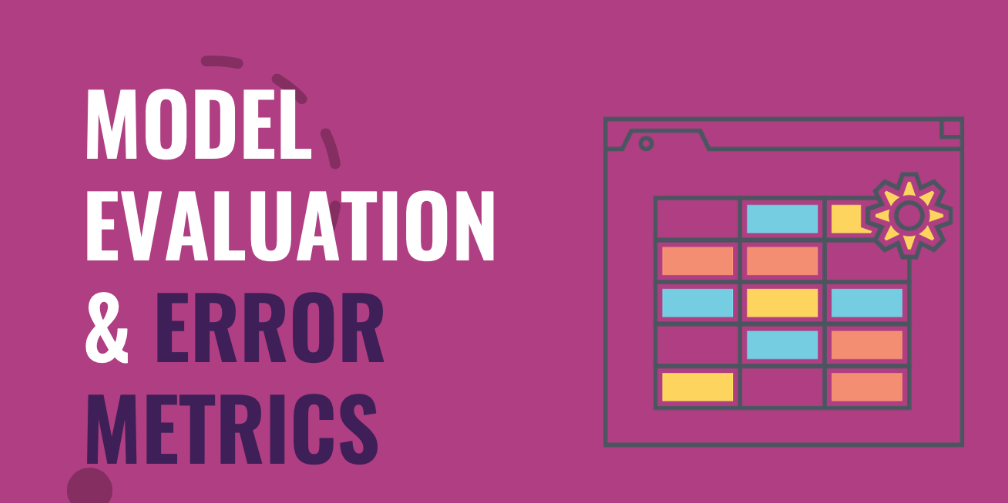

Let's now discuss some common evaluation metrics for time series forecasting:
* **Mean Absolute Error (MAE):** This metric calculates the average absolute difference between the predicted and actual values. A lower MAE indicates better accuracy.

* **Mean Squared Error (MSE):** This metric calculates the average squared difference between the predicted and actual values. MSE penalizes large errors more heavily than MAE.

* **Root Mean Squared Error (RMSE):** This metric is the square root of MSE and is commonly used because it is in the same unit as the original data.

* **Mean Absolute Percentage Error (MAPE):** This metric calculates the average percentage difference between the predicted and actual values. It is useful when we want to evaluate the performance of the model on a relative scale.

* **Symmetric Mean Absolute Percentage Error (SMAPE):** This metric is similar to MAPE but is symmetric and handles zeros in the data more robustly.

* **Forecast Error Variance Decomposition (FEVD):** This metric decomposes the variance of the forecast errors into contributions from the model's individual components. It can be used to diagnose the sources of error in the model.

* **Theil's U-Statistic:** This metric compares the accuracy of the model's predictions to that of a naive forecast, which simply uses the last observed value as the prediction for the next time step. Theil's U-Statistic ranges from 0 to 1, with 0 indicating perfect prediction and 1 indicating no improvement over the naive forecast.


## **Summary of the coding section**

In this example, we used the ARIMA model to forecast the number of airline passengers for the next 12 months. We started by checking the stationarity of the time series and transforming the data to make it stationary. We then split the data into training and testing sets and fit an ARIMA model to the training data. We made predictions on the testing data and calculated the RMSE between the predicted values and the actual values. Finally, we used the trained model to forecast future values of the time series for the next 12 months.

Time series forecasting is an important tool in many applications such as finance, economics, and engineering. It can help businesses and organizations make informed decisions by providing them with insights into future trends and patterns in their data. Python provides a rich set of tools and libraries for time series analysis and forecasting, such as pandas, numpy, matplotlib, and statsmodels.

## **Conclusion:**
In this notebook, we explored time series forecasting using the ARIMA model. We first loaded the airline passengers dataset and prepared the data by converting it to a stationary time series. We then used the ARIMA model to make predictions on the dataset, tuning the parameters to obtain the best model fit. We also visualized the predictions and the actual data to compare them and measure the accuracy of our model.

Overall, we were able to obtain a reasonably accurate forecast using the ARIMA model. However, the model can still be improved by further tuning the parameters and by exploring other time series models. Time series forecasting is a powerful technique that can be applied to a wide range of real-world problems, and ARIMA is a useful tool to have in your data science toolkit.

## **References:**
* Hands-on Time series analysis: The Book
* https://www.techtarget.com/whatis/definition/time-series-forecasting
* https://builtin.com/data-science/time-series-forecasting-python
* https://www.youtube.com/watch?v=vV12dGe_Fho&t=140s

# **MIT Licence**
MIT License
Copyright (c) 2023 Hamzah Mukadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
